In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_seq_items', None)

In [3]:
url = 'https://fbref.com/en/comps/13/schedule/Ligue-1-Scores-and-Fixtures'

ligue_list = []


ligue_list.append(pd.read_html(url,index_col=False,flavor='lxml')[0])
ligue_list = pd.concat(ligue_list, axis=0, ignore_index=True)
ligue_list.head(10)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2022-08-05,21:00,Lyon,1.3,2–1,1.5,Ajaccio,48516.0,Matmut Stadium de Gerland,Benoît Bastien,Match Report,NaN
1,1.0,Sat,2022-08-06,17:00,Strasbourg,0.8,1–2,2.8,Monaco,25359.0,Stade de la Meinau,François Letexier,Match Report,NaN
2,1.0,Sat,2022-08-06,21:00,Clermont Foot,0.3,0–5,3.5,Paris S-G,12203.0,Stade Gabriel Montpied,Jeremy Stinat,Match Report,NaN
3,1.0,Sun,2022-08-07,13:00,Toulouse,0.9,1–1,1.2,Nice,20567.0,Stadium Municipal,Johan Hamel,Match Report,NaN
4,1.0,Sun,2022-08-07,15:00,Lens,2.5,3–2,1.2,Brest,37015.0,Stade Bollaert-Delelis,Thomas Léonard,Match Report,NaN
5,1.0,Sun,2022-08-07,15:00,Angers,1.5,0–0,1.5,Nantes,12000.0,Stade Raymond Kopa,Hakim Ben El Hadj Salem,Match Report,NaN
6,1.0,Sun,2022-08-07,15:00,Lille,2.4,4–1,0.6,Auxerre,32292.0,Decathlon Arena - Stade Pierre-Mauroy,Eric Wattellier,Match Report,NaN
7,1.0,Sun,2022-08-07,15:00,Montpellier,1.7,3–2,2.0,Troyes,12003.0,Stade Raoul-Barrière,Pierre Gaillouste,Match Report,NaN
8,1.0,Sun,2022-08-07,17:05,Rennes,1.8,0–1,1.1,Lorient,28177.0,Roazhon Park,Bastien Dechepy,Match Report,NaN
9,1.0,Sun,2022-08-07,20:45,Marseille,2.1,4–1,0.9,Reims,62738.0,Orange Vélodrome,Jérôme Brisard,Match Report,NaN


In [4]:
ligue_list.tail(10)

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
408,38.0,Sat,2023-06-03,NaN,Paris S-G,NaN,NaN,NaN,Clermont Foot,NaN,NaN,NaN,Head-to-Head,NaN
409,38.0,Sat,2023-06-03,NaN,Monaco,NaN,NaN,NaN,Toulouse,NaN,NaN,NaN,Head-to-Head,NaN
410,38.0,Sat,2023-06-03,NaN,Ajaccio,NaN,NaN,NaN,Marseille,NaN,NaN,NaN,Head-to-Head,NaN
411,38.0,Sat,2023-06-03,NaN,Reims,NaN,NaN,NaN,Montpellier,NaN,NaN,NaN,Head-to-Head,NaN
412,38.0,Sat,2023-06-03,NaN,Nantes,NaN,NaN,NaN,Angers,NaN,NaN,NaN,Head-to-Head,NaN
413,38.0,Sat,2023-06-03,NaN,Nice,NaN,NaN,NaN,Lyon,NaN,NaN,NaN,Head-to-Head,NaN
414,38.0,Sat,2023-06-03,NaN,Troyes,NaN,NaN,NaN,Lille,NaN,NaN,NaN,Head-to-Head,NaN
415,38.0,Sat,2023-06-03,NaN,Auxerre,NaN,NaN,NaN,Lens,NaN,NaN,NaN,Head-to-Head,NaN
416,38.0,Sat,2023-06-03,NaN,Lorient,NaN,NaN,NaN,Strasbourg,NaN,NaN,NaN,Head-to-Head,NaN
417,38.0,Sat,2023-06-03,NaN,Brest,NaN,NaN,NaN,Rennes,NaN,NaN,NaN,Head-to-Head,NaN


In [5]:
ligue1_df = ligue_list[ligue_list['Wk'].notna()]
ligue1_df.head()

,Wk,Day,Date,Time,Home,xG,Score,xG.1,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2022-08-05,21:00,Lyon,1.3,2–1,1.5,Ajaccio,48516.0,Matmut Stadium de Gerland,Benoît Bastien,Match Report,NaN
1,1.0,Sat,2022-08-06,17:00,Strasbourg,0.8,1–2,2.8,Monaco,25359.0,Stade de la Meinau,François Letexier,Match Report,NaN
2,1.0,Sat,2022-08-06,21:00,Clermont Foot,0.3,0–5,3.5,Paris S-G,12203.0,Stade Gabriel Montpied,Jeremy Stinat,Match Report,NaN
3,1.0,Sun,2022-08-07,13:00,Toulouse,0.9,1–1,1.2,Nice,20567.0,Stadium Municipal,Johan Hamel,Match Report,NaN
4,1.0,Sun,2022-08-07,15:00,Lens,2.5,3–2,1.2,Brest,37015.0,Stade Bollaert-Delelis,Thomas Léonard,Match Report,NaN


In [6]:
ligue1_df = ligue1_df.rename(columns={'xG':'xGHome', 'xG.1':'xGAway'})
ligue1_df.head(1)

,Wk,Day,Date,Time,Home,xGHome,Score,xGAway,Away,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,2022-08-05,21:00,Lyon,1.3,2–1,1.5,Ajaccio,48516.0,Matmut Stadium de Gerland,Benoît Bastien,Match Report,NaN


In [7]:
ligue1_df['HomeScore'] = ligue1_df['Score'].str[0]
ligue1_df['AwayScore'] = ligue1_df['Score'].str[2]
ligue1_df.head(7)

,Wk,Day,Date,Time,Home,xGHome,Score,xGAway,Away,Attendance,Venue,Referee,Match Report,Notes,HomeScore,AwayScore
0,1.0,Fri,2022-08-05,21:00,Lyon,1.3,2–1,1.5,Ajaccio,48516.0,Matmut Stadium de Gerland,Benoît Bastien,Match Report,NaN,2,1
1,1.0,Sat,2022-08-06,17:00,Strasbourg,0.8,1–2,2.8,Monaco,25359.0,Stade de la Meinau,François Letexier,Match Report,NaN,1,2
2,1.0,Sat,2022-08-06,21:00,Clermont Foot,0.3,0–5,3.5,Paris S-G,12203.0,Stade Gabriel Montpied,Jeremy Stinat,Match Report,NaN,0,5
3,1.0,Sun,2022-08-07,13:00,Toulouse,0.9,1–1,1.2,Nice,20567.0,Stadium Municipal,Johan Hamel,Match Report,NaN,1,1
4,1.0,Sun,2022-08-07,15:00,Lens,2.5,3–2,1.2,Brest,37015.0,Stade Bollaert-Delelis,Thomas Léonard,Match Report,NaN,3,2
5,1.0,Sun,2022-08-07,15:00,Angers,1.5,0–0,1.5,Nantes,12000.0,Stade Raymond Kopa,Hakim Ben El Hadj Salem,Match Report,NaN,0,0
6,1.0,Sun,2022-08-07,15:00,Lille,2.4,4–1,0.6,Auxerre,32292.0,Decathlon Arena - Stade Pierre-Mauroy,Eric Wattellier,Match Report,NaN,4,1


In [8]:
ligue1_df = ligue1_df.drop(['Match Report','Notes'],axis=1)
ligue1_df.head(3)

,Wk,Day,Date,Time,Home,xGHome,Score,xGAway,Away,Attendance,Venue,Referee,HomeScore,AwayScore
0,1.0,Fri,2022-08-05,21:00,Lyon,1.3,2–1,1.5,Ajaccio,48516.0,Matmut Stadium de Gerland,Benoît Bastien,2,1
1,1.0,Sat,2022-08-06,17:00,Strasbourg,0.8,1–2,2.8,Monaco,25359.0,Stade de la Meinau,François Letexier,1,2
2,1.0,Sat,2022-08-06,21:00,Clermont Foot,0.3,0–5,3.5,Paris S-G,12203.0,Stade Gabriel Montpied,Jeremy Stinat,0,5


In [9]:
ligue1_df['Date'] = pd.to_datetime(ligue1_df['Date'])
ligue1_df.sort_values(by='Date', inplace=True)
ligue1_df = ligue1_df[['Wk', 'Day', 'Date', 'Time', 'Home',
                       'HomeScore', 'xGHome', 'AwayScore', 
                       'xGAway','Away','Attendance','Venue','Referee']]
ligue1_df.head()

,Wk,Day,Date,Time,Home,HomeScore,xGHome,AwayScore,xGAway,Away,Attendance,Venue,Referee
0,1.0,Fri,2022-08-05,21:00,Lyon,2,1.3,1,1.5,Ajaccio,48516.0,Matmut Stadium de Gerland,Benoît Bastien
1,1.0,Sat,2022-08-06,17:00,Strasbourg,1,0.8,2,2.8,Monaco,25359.0,Stade de la Meinau,François Letexier
2,1.0,Sat,2022-08-06,21:00,Clermont Foot,0,0.3,5,3.5,Paris S-G,12203.0,Stade Gabriel Montpied,Jeremy Stinat
8,1.0,Sun,2022-08-07,17:05,Rennes,0,1.8,1,1.1,Lorient,28177.0,Roazhon Park,Bastien Dechepy
7,1.0,Sun,2022-08-07,15:00,Montpellier,3,1.7,2,2.0,Troyes,12003.0,Stade Raoul-Barrière,Pierre Gaillouste


In [10]:
ligue1_df = ligue1_df.dropna()
ligue1_df = ligue1_df[['Date', 'Home', 'HomeScore', 'xGHome', 
                       'AwayScore', 'xGAway', 'Away']].reset_index(drop=True)
ligue1_df.head(3)

,Date,Home,HomeScore,xGHome,AwayScore,xGAway,Away
0,2022-08-05,Lyon,2,1.3,1,1.5,Ajaccio
1,2022-08-06,Strasbourg,1,0.8,2,2.8,Monaco
2,2022-08-06,Clermont Foot,0,0.3,5,3.5,Paris S-G


In [11]:
league_Mean_Home_xG = round((ligue1_df['xGHome'].mean()),2)
league_Mean_Away_xG = round((ligue1_df['xGAway'].mean()),2)

print(league_Mean_Home_xG)
print(league_Mean_Away_xG)

1.5
1.31


In [12]:
home_team_xg_strength_offense = ligue1_df.groupby('Home').agg({'xGHome': 'sum', 'Home': ['count', 'first']})
home_team_xg_strength_offense.head()

xGHome  Home               
                 sum count          first
Home                                     
Ajaccio         17.8    13        Ajaccio
Angers          18.7    14         Angers
Auxerre         15.4    13        Auxerre
Brest           15.1    13          Brest
Clermont Foot   15.5    14  Clermont Foot

In [13]:
home_team_xg_strength_offense.columns = ['xGHome', 'TotalGames', 'Home']
home_team_xg_strength_offense.head()

,xGHome,TotalGames,Home
Home,,,
Ajaccio,17.8,13,Ajaccio
Angers,18.7,14,Angers
Auxerre,15.4,13,Auxerre
Brest,15.1,13,Brest
Clermont Foot,15.5,14,Clermont Foot


In [14]:
home_team_xg_strength_offense['xGHome_offense_rating'] = (home_team_xg_strength_offense['xGHome'] / home_team_xg_strength_offense['TotalGames']) / league_Mean_Home_xG
home_team_xg_strength_offense = home_team_xg_strength_offense.reset_index(drop = True)
home_team_xg_strength_offense.head()

,xGHome,TotalGames,Home,xGHome_offense_rating
0,17.8,13,Ajaccio,0.912821
1,18.7,14,Angers,0.890476
2,15.4,13,Auxerre,0.789744
3,15.1,13,Brest,0.774359
4,15.5,14,Clermont Foot,0.738095


In [15]:
home_team_xg_strength_offense = pd.DataFrame(home_team_xg_strength_offense)
home_team_xg_strength_offense.columns = ['xGHome', 'TotalGames','Home','xGHome_offense_rating']
home_team_xg_strength_offense = home_team_xg_strength_offense[['Home','xGHome','TotalGames','xGHome_offense_rating']]
home_team_xg_strength_offense.sort_values('xGHome_offense_rating', ascending=False)
home_team_xg_strength_offense.head()

,Home,xGHome,TotalGames,xGHome_offense_rating
0,Ajaccio,17.8,13,0.912821
1,Angers,18.7,14,0.890476
2,Auxerre,15.4,13,0.789744
3,Brest,15.1,13,0.774359
4,Clermont Foot,15.5,14,0.738095


In [16]:
lyon_home_offense_rating = 1.179361
lens_away_defense_rating = 1.105651

lyon_home_expected_xg = (lyon_home_offense_rating * lens_away_defense_rating) * league_Mean_Home_xG

lens_away_offense_rating = 1.291866
lyon_home_defense_rating = 0.840738

lens_away_expected_xg = (lens_away_offense_rating * lyon_home_defense_rating) * league_Mean_Away_xG

print(lyon_home_expected_xg)
print(lens_away_expected_xg)

1.9559425035165001
1.42281829661148


In [17]:
home_expectancy = lyon_home_expected_xg
away_expectancy = lens_away_expected_xg

max_score = 7
score_range = np.arange(0, max_score+1)
score_range

array([0, 1, 2, 3, 4, 5, 6, 7])

In [18]:
home_pmf = poisson.pmf(score_range, home_expectancy)
away_pmf = poisson.pmf(score_range, away_expectancy)

print(home_pmf)
print(away_pmf)

[0.14143111 0.27663113 0.27053729 0.17638513 0.08624979 0.03373993
 0.01099889 0.00307331]
[0.24103375 0.34294724 0.2439758  0.11571108 0.04115896 0.01171234
 0.00277742 0.00056454]


In [19]:
# calculate the outer product of the home and away PMFs
score_prob_matrix = np.outer(home_pmf, away_pmf)
score_prob_matrix

array([[3.40896725e-02, 4.85034097e-02, 3.45057694e-02, 1.63651467e-02,
        5.82115753e-03, 1.65648989e-03, 3.92814020e-04, 7.98432822e-05],
       [6.66774394e-02, 9.48698807e-02, 6.74913010e-02, 3.20092860e-02,
        1.13858494e-02, 3.23999898e-03, 7.68321639e-04, 1.56168869e-04],
       [6.52086188e-02, 9.27800160e-02, 6.60045521e-02, 3.13041615e-02,
        1.11350334e-02, 3.16862586e-03, 7.51396475e-04, 1.52728665e-04],
       [4.25147697e-02, 6.04907922e-02, 4.30337030e-02, 2.04097133e-02,
        7.25982839e-03, 2.06588333e-03, 4.89896101e-04, 9.95761622e-05],
       [2.07891113e-02, 2.95791279e-02, 2.10428622e-02, 9.98005644e-03,
        3.54995173e-03, 1.01018725e-03, 2.39552151e-04, 4.86913120e-05],
       [8.13246127e-03, 1.15710147e-02, 8.23172571e-03, 3.90408332e-03,
        1.38870029e-03, 3.95173637e-04, 9.37100469e-05, 1.90474813e-05],
       [2.65110444e-03, 3.77203991e-03, 2.68346370e-03, 1.27269375e-03,
        4.52702988e-04, 1.28822819e-04, 3.05485773e-05, 6.

In [20]:
# reshape the matrix into a square matrix of score probabilities
score_prob_matrix = score_prob_matrix.reshape(max_score+1, max_score+1)
score_prob_matrix

array([[3.40896725e-02, 4.85034097e-02, 3.45057694e-02, 1.63651467e-02,
        5.82115753e-03, 1.65648989e-03, 3.92814020e-04, 7.98432822e-05],
       [6.66774394e-02, 9.48698807e-02, 6.74913010e-02, 3.20092860e-02,
        1.13858494e-02, 3.23999898e-03, 7.68321639e-04, 1.56168869e-04],
       [6.52086188e-02, 9.27800160e-02, 6.60045521e-02, 3.13041615e-02,
        1.11350334e-02, 3.16862586e-03, 7.51396475e-04, 1.52728665e-04],
       [4.25147697e-02, 6.04907922e-02, 4.30337030e-02, 2.04097133e-02,
        7.25982839e-03, 2.06588333e-03, 4.89896101e-04, 9.95761622e-05],
       [2.07891113e-02, 2.95791279e-02, 2.10428622e-02, 9.98005644e-03,
        3.54995173e-03, 1.01018725e-03, 2.39552151e-04, 4.86913120e-05],
       [8.13246127e-03, 1.15710147e-02, 8.23172571e-03, 3.90408332e-03,
        1.38870029e-03, 3.95173637e-04, 9.37100469e-05, 1.90474813e-05],
       [2.65110444e-03, 3.77203991e-03, 2.68346370e-03, 1.27269375e-03,
        4.52702988e-04, 1.28822819e-04, 3.05485773e-05, 6.

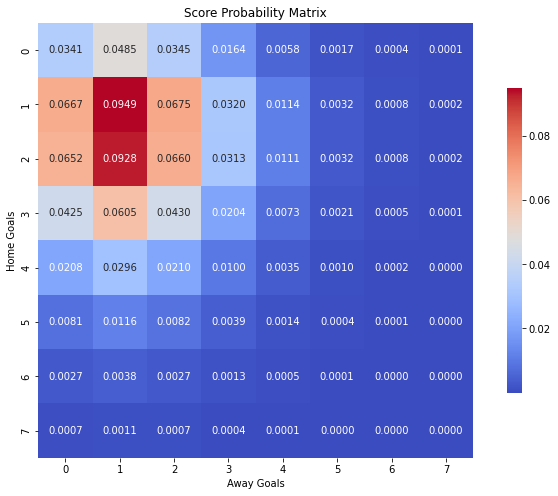

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(score_prob_matrix, cmap='coolwarm', annot=True, fmt='.4f', square=True, cbar_kws={'shrink': 0.7}, ax=ax)
plt.xlabel('Away Goals')
plt.ylabel('Home Goals')
plt.title('Score Probability Matrix')
plt.show()

In [22]:
# calculate the sums of home wins, draws, and away wins
home_wins = np.sum(np.tril(score_prob_matrix, -1))
draws = np.sum(np.diag(score_prob_matrix))
away_wins = np.sum(np.triu(score_prob_matrix, 1))

# create a table to display the sums
table_data = {
    'Home Wins': [home_wins],
    'Draws': [draws],
    'Away Wins': [away_wins]
}
table = pd.DataFrame(table_data)

table

,Home Wins,Draws,Away Wins
0,0.499357,0.219351,0.28022


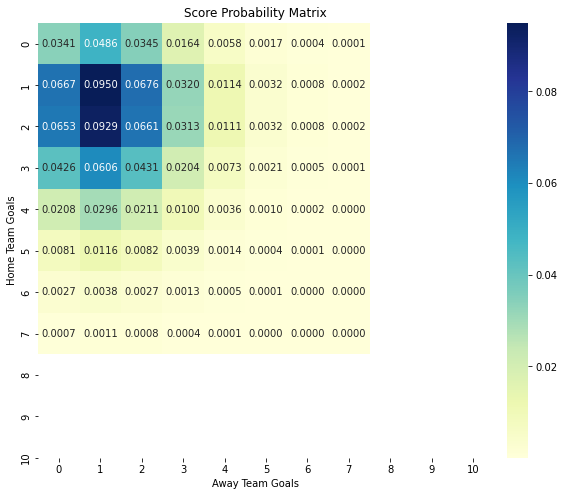

In [23]:
home_expectancy = 1.9298632701362801
away_expectancy = 1.44454071335364

max_score = 10
score_range = np.arange(0, max_score+1)

# Calculate the probabilities of scoring zero goals using the Poisson distribution with a lambda of zero
home_zero_pmf = poisson.pmf(0, home_expectancy)
away_zero_pmf = poisson.pmf(0, away_expectancy)

# Calculate the probabilities of scoring non-zero goals using the Poisson distribution with lambda equal to the expectancies
home_nonzero_pmf = poisson.pmf(score_range, home_expectancy)
away_nonzero_pmf = poisson.pmf(score_range, away_expectancy)

# Combine the probabilities of zero and non-zero goals using the zero-inflated Poisson distribution
home_pmf = (1 - home_zero_pmf) * home_nonzero_pmf
away_pmf = (1 - away_zero_pmf) * away_nonzero_pmf

# Normalize the score probabilities to sum to 1.0 over the truncated range
score_prob_matrix /= score_prob_matrix.sum()

# set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Display the score probability matrix as a heatmap
sns.heatmap(score_prob_matrix, cmap='YlGnBu', annot=True, fmt='.4f', square=True, xticklabels=score_range, yticklabels=score_range)

plt.xlabel('Away Team Goals')
plt.ylabel('Home Team Goals')
plt.title('Score Probability Matrix')

plt.show()